<a href="https://colab.research.google.com/github/AmbujaShetty/WoTech-Python/blob/main/WoTech-Python/17Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
advertising = pd.read_csv('/content/tvmarketing.csv')
# TV- advertising budget spent on TV marketing
# Sales - how much we sold(income)

In [ ]:
advertising.head() #first 5 rows

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [ ]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

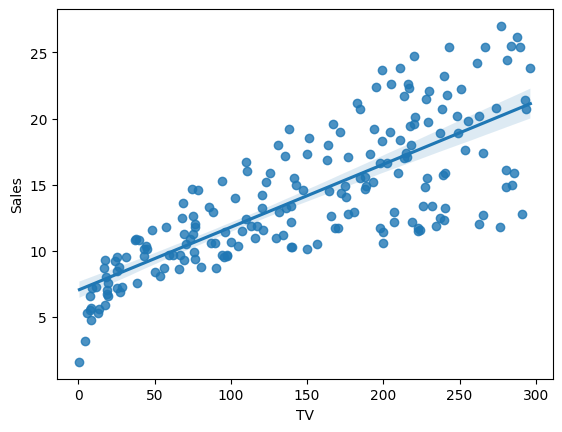

In [ ]:
import seaborn as sns
sns.regplot(x='TV',y='Sales',data=advertising)

<Axes: xlabel='TV', ylabel='Sales'>

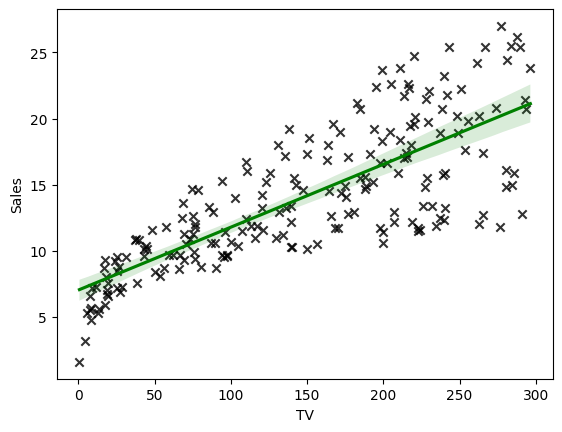

In [ ]:
    sns.regplot(
    data=advertising,
    x='TV',
    y="Sales",
    ci=99,
    marker="x",
    color="black",
    line_kws=dict(color="green"))

In [ ]:
#Pearson correlation coefficient
advertising.corr()

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


Supervised Vs Unsupervised learning


In [ ]:
# training linear regreessin model
X = advertising.drop('Sales', axis=1)
X.head()

Y = advertising.drop('TV', axis=1) # this is the outcome, dependent
Y.head()


,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [ ]:
#Train/Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7) # trains value and we get diffrent results everytime
X_train

,TV
122,224.0
154,187.8
162,188.4
153,171.3
120,141.3
...,...
70,199.1
106,25.0
132,8.4
32,97.2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state=42) # trains value and we get same results everytime
X_train

,TV
169,284.3
97,184.9
31,112.9
12,23.8
35,290.7
...,...
106,25.0
14,204.1
92,217.7
179,165.6


# Row - observation
# column - feature
Train the model

In [ ]:
from sklearn.linear_model import LinearRegression #Import the model
model = LinearRegression() #Initialize the model
model.fit(X_train, y_train) #Fit the model

LinearRegression()

In [ ]:
## linear regression , Y = mX+b
print(f'model.intercept is: {model.intercept_}')

print(f'model.coefficient is: {model.coef_}')


model.intercept is: [7.23945983]
model.coefficient is: [[0.0464078]]


In [ ]:
#Aprediction

my_new_budget = [[50]] #2D array dataset

my_predicted_sales = model.predict(my_new_budget)

print(f'When the new budget is {my_new_budget[0][0]}, then predicted sales are {round(my_predicted_sales[0][0])}.')


When the new budget is 50, then predicted sales are 10.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
X_test.head()
y_pred = model.predict(X_test)


In [ ]:
final_df = pd.DataFrame()
final_df['TV'] = X_test
final_df['Actual_sales'] = y_test
final_df['Predicted_sales'] = y_pred
final_df['ABS_Error_Actual_vs_Predicted'] = abs(final_df['Actual_sales']-final_df['Predicted_sales'])
final_df.head()

,TV,Actual_sales,Predicted_sales,ABS_Error_Actual_vs_Predicted
95,163.3,16.9,14.817854,2.082146
15,195.4,22.4,16.307544,6.092456
30,292.9,21.4,20.832305,0.567695
158,11.7,7.3,7.782431,0.482431
128,220.3,24.7,17.463099,7.236901
